# Ejemplo práctico de generalización
**Autor:** Jazna Meza Hidalgo

**Correo Electrónico:** ja.meza@profesor.duoc.cl

**Fecha de Creación:** Septiembre de 2022  
**Versión:** 1.0  

**Fecha de Actualización:** Febrero de 2025  
**Versión:** 2.0  

---

## Descripción


Keras también ayuda a entrenar redes que sean capaces de generalizar de manera muy simple.

En este notebook se usa un conjunto de entrenamiento (train) y otro conjunto diferente de prueba o validación (test). La idea es entrenar con un conjunto distinto al usado para evaluar el desempeño de la red.

También se revisará cómo la regularización ayuda a mejorar la generalización.

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- numpy (1.26.4)
- matplotlib (3.7.1)
- tensorflow (2.18.0)

Para verificar la versión instalada ejecutar usando el nombre del paquete del cual quieres saber la versión; por ejemplo, si quieres saber la versión de sklearn usas:

```bash
import numpy
print(numpy.__version__)
````

In [1]:
# Importa librerías necesarias
import numpy as np
import tensorflow as tf

from matplotlib import pyplot as plt
from tensorflow import keras

In [2]:
# Carga datos de entrenamiento y prueba de CIFAR10

(imgs_train,labs_train), (imgs_test,labs_test) = keras.datasets.cifar10.load_data()
print(imgs_train.shape)
print(imgs_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [3]:
nombres = ['avión', 'auto', 'pájaro', 'gato', 'venado', 'perro', 'rana', 'caballo', 'barco', 'camión']

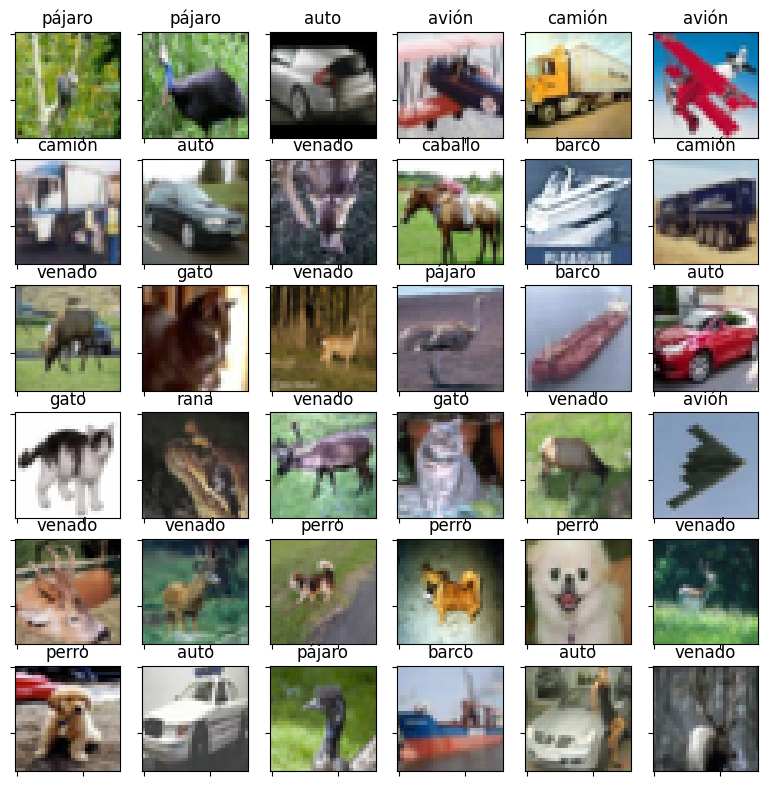

In [4]:
# Muestra una grilla de ejemplos (al azar) del conjunto de test

h = 6 # alto de la grilla
w = 6 # ancho de la grilla
fig, axs = plt.subplots(h, w, figsize=(1.6*h,1.6*w))
for i in range(h):
  for j in range(w):
    ex = np.random.randint(len(imgs_test))
    axs[i,j].set_title(nombres[labs_test[ex][0]])
    axs[i,j].grid(False)
    axs[i,j].set_xticklabels([])
    axs[i,j].set_yticklabels([])
    axs[i,j].imshow(imgs_test[ex])

In [5]:
# Tranforma los datos para el entrenamiento,
# Necesita transformar tanto el train como el test

X_train = imgs_train.reshape(50000,32*32*3)
X_test = imgs_test.reshape(10000,32*32*3)
# Normaliza
X_train = X_train / 255
X_test = X_test / 255

print('X', X_train.shape, X_test.shape)

Y_train = keras.utils.to_categorical(labs_train, 10)
Y_test = keras.utils.to_categorical(labs_test, 10)

print('Y', Y_train.shape, Y_test.shape)

X (50000, 3072) (10000, 3072)
Y (50000, 10) (10000, 10)


In [6]:
# Cantidad de ejemplos (train/test), neuronas de entrada y neuronas de salida

M_train = X_train.shape[0]
M_test = X_test.shape[0]

N = X_train.shape[1]
C = Y_train.shape[1]

print(N,C,M_train,M_test)

3072 10 50000 10000


In [7]:
# Setea los seed para números random

np.random.seed(29)
tf.random.set_seed(29)

# Crea la red feed-forward (tiene 3 capas escondidas!)

h1 = 512
h2 = 256

red = keras.Sequential(name="Ejemplo")
red.add(keras.layers.Input(shape=(N,), name='entrada'))
red.add(keras.layers.Dense(h1, activation='relu', name="Primera_capa"))
red.add(keras.layers.Dense(h2, activation='relu', name="Segunda_capa"))
red.add(keras.layers.Dense(h2, activation='relu', name="Tercera_capa"))
red.add(keras.layers.Dense(C, activation='softmax', name="Capa_salida"))

red.summary()

red.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

Model: "Ejemplo"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Primera_capa (Dense)                 │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Segunda_capa (Dense)                 │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Tercera_capa (Dense)                 │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Capa_salida (Dense)                  │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,773,066 (6.76 MB)

 Trainable params: 1,773,066 (6.76 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
hist = red.fit(X_train, Y_train,
        epochs=150,
        batch_size=128,
        validation_data=(X_test,Y_test)
       )

Epoch 1/150
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.2360 - loss: 2.1085 - val_accuracy: 0.3252 - val_loss: 1.8704
Epoch 2/150
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3505 - loss: 1.8303 - val_accuracy: 0.3695 - val_loss: 1.7661
Epoch 3/150
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3845 - loss: 1.7469 - val_accuracy: 0.3904 - val_loss: 1.7056
Epoch 4/150
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4046 - loss: 1.6893 - val_accuracy: 0.4104 - val_loss: 1.6604
Epoch 5/150
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4191 - loss: 1.6455 - val_accuracy: 0.4224 - val_loss: 1.6273
Epoch 6/150
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4319 - loss: 1.6090 - val_accuracy: 0.4323 - val_loss: 1.5983
Epoch 7/150
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4446 - loss: 1.5777 - val_accuracy: 0.4402 - val_loss: 1.5755
Epoch 8/150
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4562 - loss: 1.5500 - val_acc

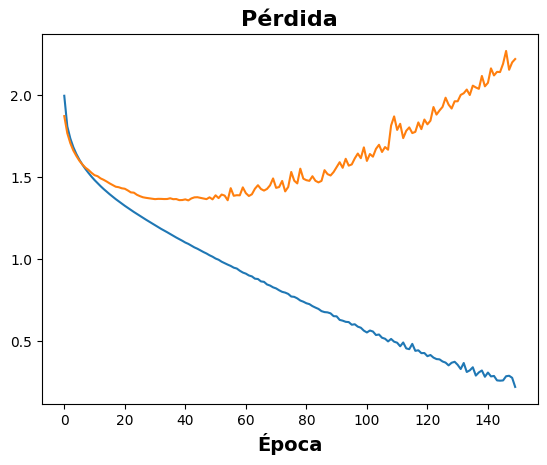

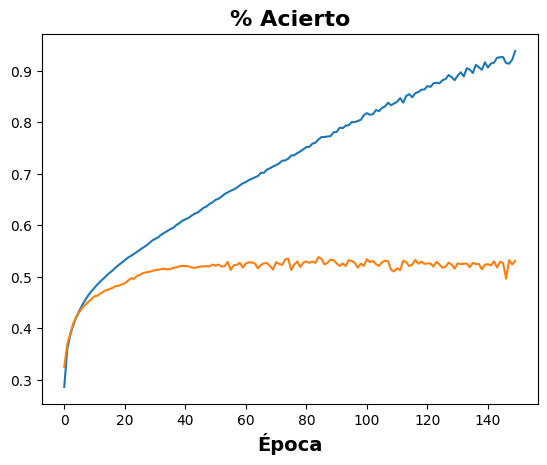

In [9]:
# Muestra la pérdida y el acierto por cada época

"""
Este grafico (el primero) muestra en el grafico azul la funcion de costo (si decrementa es porque está aprendiendo)
de los datos de train
muestra en el grafico naranjo la funcion de costo (si decrementa es porque está aprendiendo) de los datos de test
"""
# Costo de train decrementa, costo de test aumenta, esto es indicio de overfitting (memorización de test)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Pérdida', fontweight="bold", fontsize=16)
plt.xlabel('Época', fontweight="bold", fontsize=14)
plt.show()

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('% Acierto', fontweight="bold", fontsize=16)
plt.xlabel('Época', fontweight="bold", fontsize=14)
plt.show()